<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 168.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 171.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 156.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 131.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 167.0 MB/s eta 0:00:00


In [12]:
!pip install seaborn

#### Step 1: Load the dataset


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




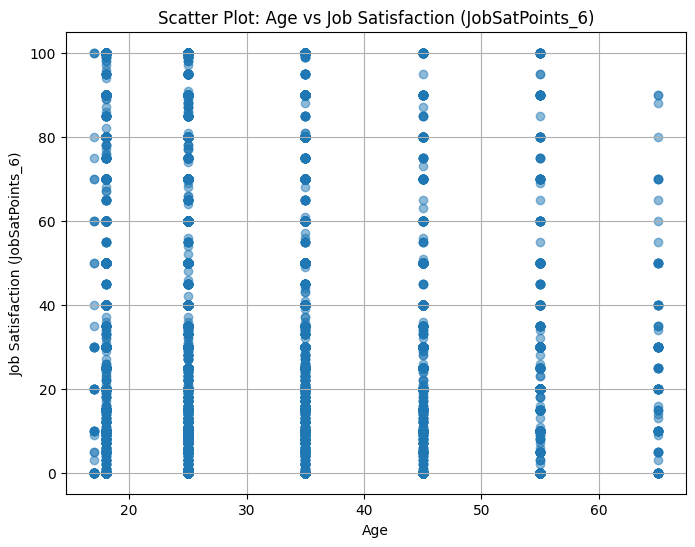

In [9]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import re

# Connect to SQLite
conn = sqlite3.connect("survey-results-public.sqlite")

# Query Age and JobSatPoints_6
query = """
SELECT Age, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Function to convert Age text into numeric
def convert_age(age):
    age = str(age).strip()

    # Case 1: "Under 18"
    if "Under" in age:
        return 17
    # Case 2: "65 or older"
    elif "65" in age and "older" in age:
        return 65
    # Case 3: "XX years old"
    elif "year" in age:
        num = re.findall(r"\d+", age)
        return float(num[0]) if num else None
    # Case 4: Range "25-34"
    elif "-" in age:
        low, high = age.split("-")
        return (int(low) + int(high)) / 2
    # Case 5: Single number
    else:
        try:
            return float(age)
        except:
            return None

# Apply conversion
df["AgeNum"] = df["Age"].apply(convert_age)

# Drop NaN
df = df.dropna(subset=["AgeNum", "JobSatPoints_6"])

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df["AgeNum"], df["JobSatPoints_6"], alpha=0.5)
plt.title("Scatter Plot: Age vs Job Satisfaction (JobSatPoints_6)")
plt.xlabel("Age")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


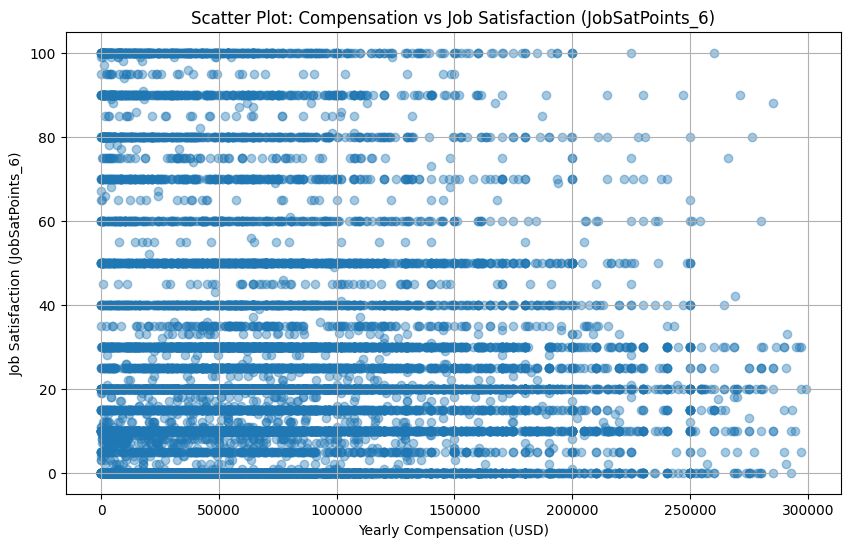

In [10]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite
conn = sqlite3.connect("survey-results-public.sqlite")

# Query Compensation and Job Satisfaction
query = """
SELECT ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Convert compensation to numeric (already numeric, but ensure)
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop NaN
df = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6"])

# Filter extreme outliers (keep salaries under $300k for visualization)
df = df[df["ConvertedCompYearly"] < 300000]

# Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(df["ConvertedCompYearly"], df["JobSatPoints_6"], alpha=0.4)
plt.title("Scatter Plot: Compensation vs Job Satisfaction (JobSatPoints_6)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.grid(True)
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


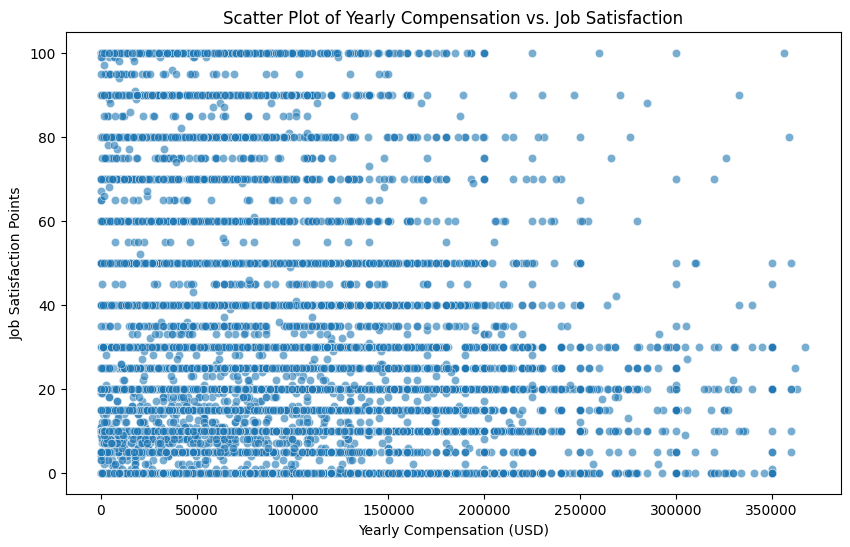

In [13]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load the required columns
df = pd.read_sql_query("SELECT ConvertedCompYearly, JobSatPoints_6 FROM main", conn)

# Close the connection
conn.close()

# Convert to numeric and handle non-numeric values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Optional: Filter out extreme outliers for better visualization
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='ConvertedCompYearly', y='JobSatPoints_6', data=df, alpha=0.6)
plt.title('Scatter Plot of Yearly Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Points')
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


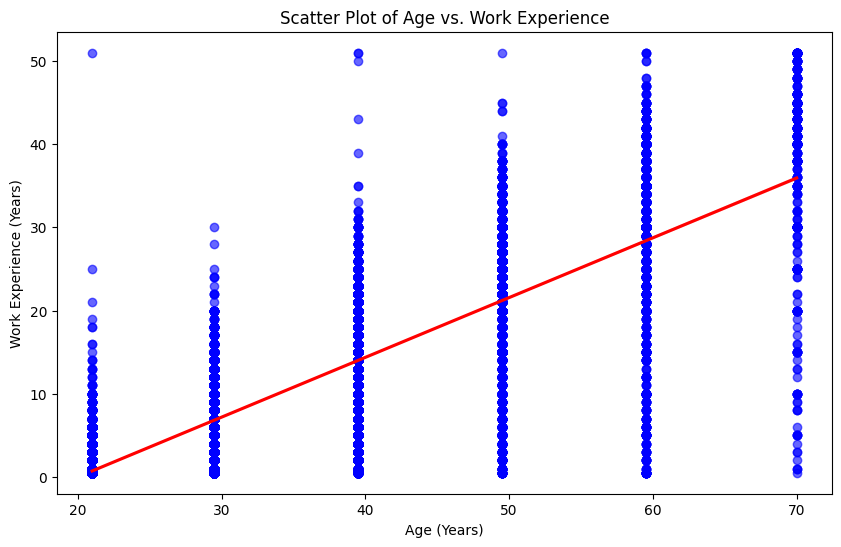

In [21]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect
conn = sqlite3.connect("survey-results-public.sqlite")
df = pd.read_sql_query("SELECT Age, YearsCodePro FROM main", conn)
conn.close()

# Map Age ranges to approximate midpoints
age_map = {
    "Under 18 years old": None,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df['Age'] = df['Age'].map(age_map)

# Clean YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace(
    {"Less than 1 year": 0.5, "More than 50 years": 51}
)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['Age', 'YearsCodePro'])

# Filter for reasonable ranges
df = df[(df['Age'] >= 18) & (df['Age'] <= 70)]
df = df[df['YearsCodePro'] >= 0]

# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(
    x='Age', y='YearsCodePro', data=df,
    scatter_kws={'alpha':0.6, 'color':'blue'},
    line_kws={'color':'red'}
)
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age (Years)')
plt.ylabel('Work Experience (Years)')
plt.show()




### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


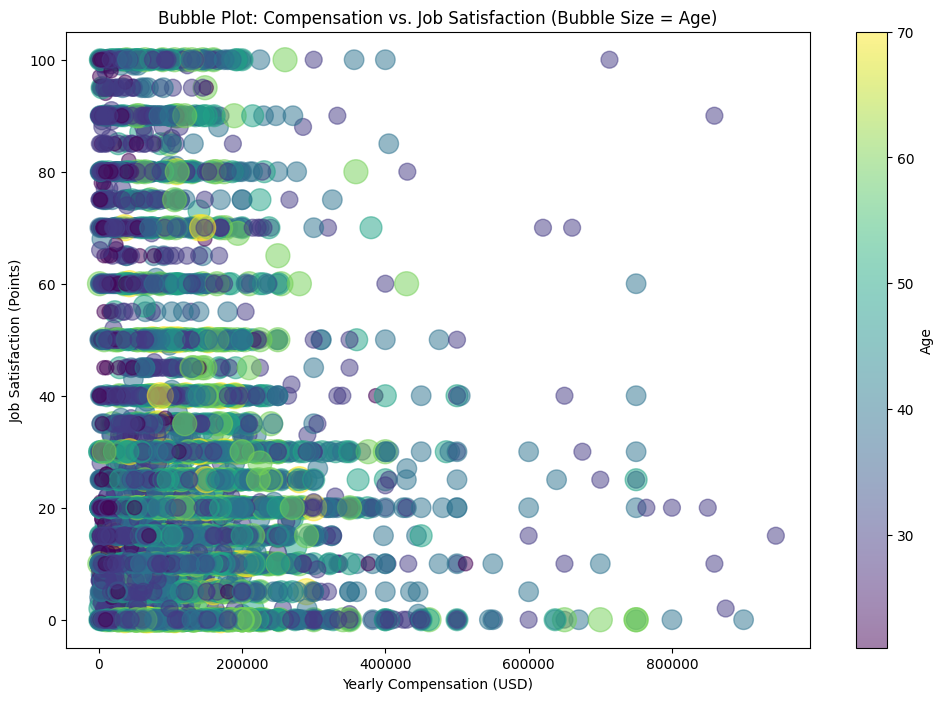

In [22]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect
conn = sqlite3.connect("survey-results-public.sqlite")
df = pd.read_sql_query("SELECT Age, ConvertedCompYearly, JobSatPoints_6 FROM main", conn)
conn.close()

# Map Age ranges to approximate midpoints
age_map = {
    "Under 18 years old": None,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}
df['Age'] = df['Age'].map(age_map)

# Convert numeric fields
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Filter unrealistic compensation (e.g. < 1K or > 1M USD)
df = df[(df['ConvertedCompYearly'] > 1000) & (df['ConvertedCompYearly'] < 1_000_000)]

# Bubble Plot
plt.figure(figsize=(12,8))
plt.scatter(
    x=df['ConvertedCompYearly'], 
    y=df['JobSatPoints_6'], 
    s=df['Age']*5,  # scale bubble size
    alpha=0.5, 
    c=df['Age'], 
    cmap='viridis'
)

plt.title("Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (Points)")
plt.colorbar(label="Age")
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


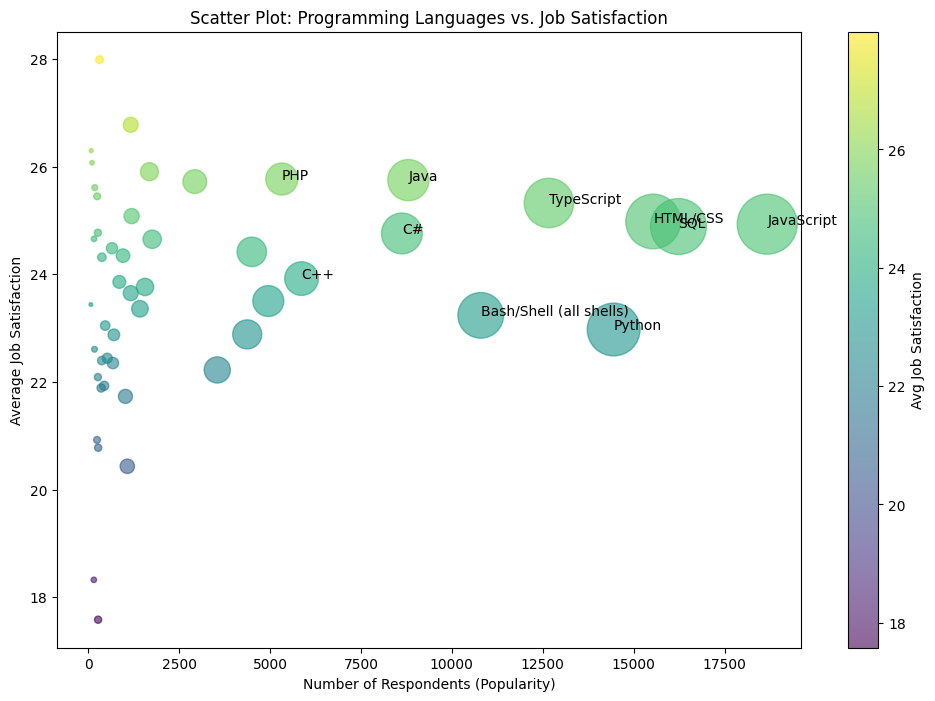

In [23]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect
conn = sqlite3.connect("survey-results-public.sqlite")
df = pd.read_sql_query("SELECT LanguageHaveWorkedWith, JobSatPoints_6 FROM main", conn)
conn.close()

# Drop missing values
df = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Convert JobSatPoints to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Split languages into rows
df_lang = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Clean whitespace
df_lang['Language'] = df_lang['Language'].str.strip()

# Group by language
lang_stats = df_lang.groupby('Language').agg(
    AvgSatisfaction=('JobSatPoints_6', 'mean'),
    Respondents=('JobSatPoints_6', 'count')
).reset_index()

# Scatter plot
plt.figure(figsize=(12,8))
plt.scatter(
    lang_stats['Respondents'],
    lang_stats['AvgSatisfaction'],
    s=lang_stats['Respondents']*0.1,   # bubble size based on popularity
    alpha=0.6,
    c=lang_stats['AvgSatisfaction'],
    cmap='viridis'
)

# Labels
plt.title("Scatter Plot: Programming Languages vs. Job Satisfaction")
plt.xlabel("Number of Respondents (Popularity)")
plt.ylabel("Average Job Satisfaction")
plt.colorbar(label="Avg Job Satisfaction")

# Annotate top languages
for i, row in lang_stats.sort_values('Respondents', ascending=False).head(10).iterrows():
    plt.text(row['Respondents'], row['AvgSatisfaction'], row['Language'])

plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


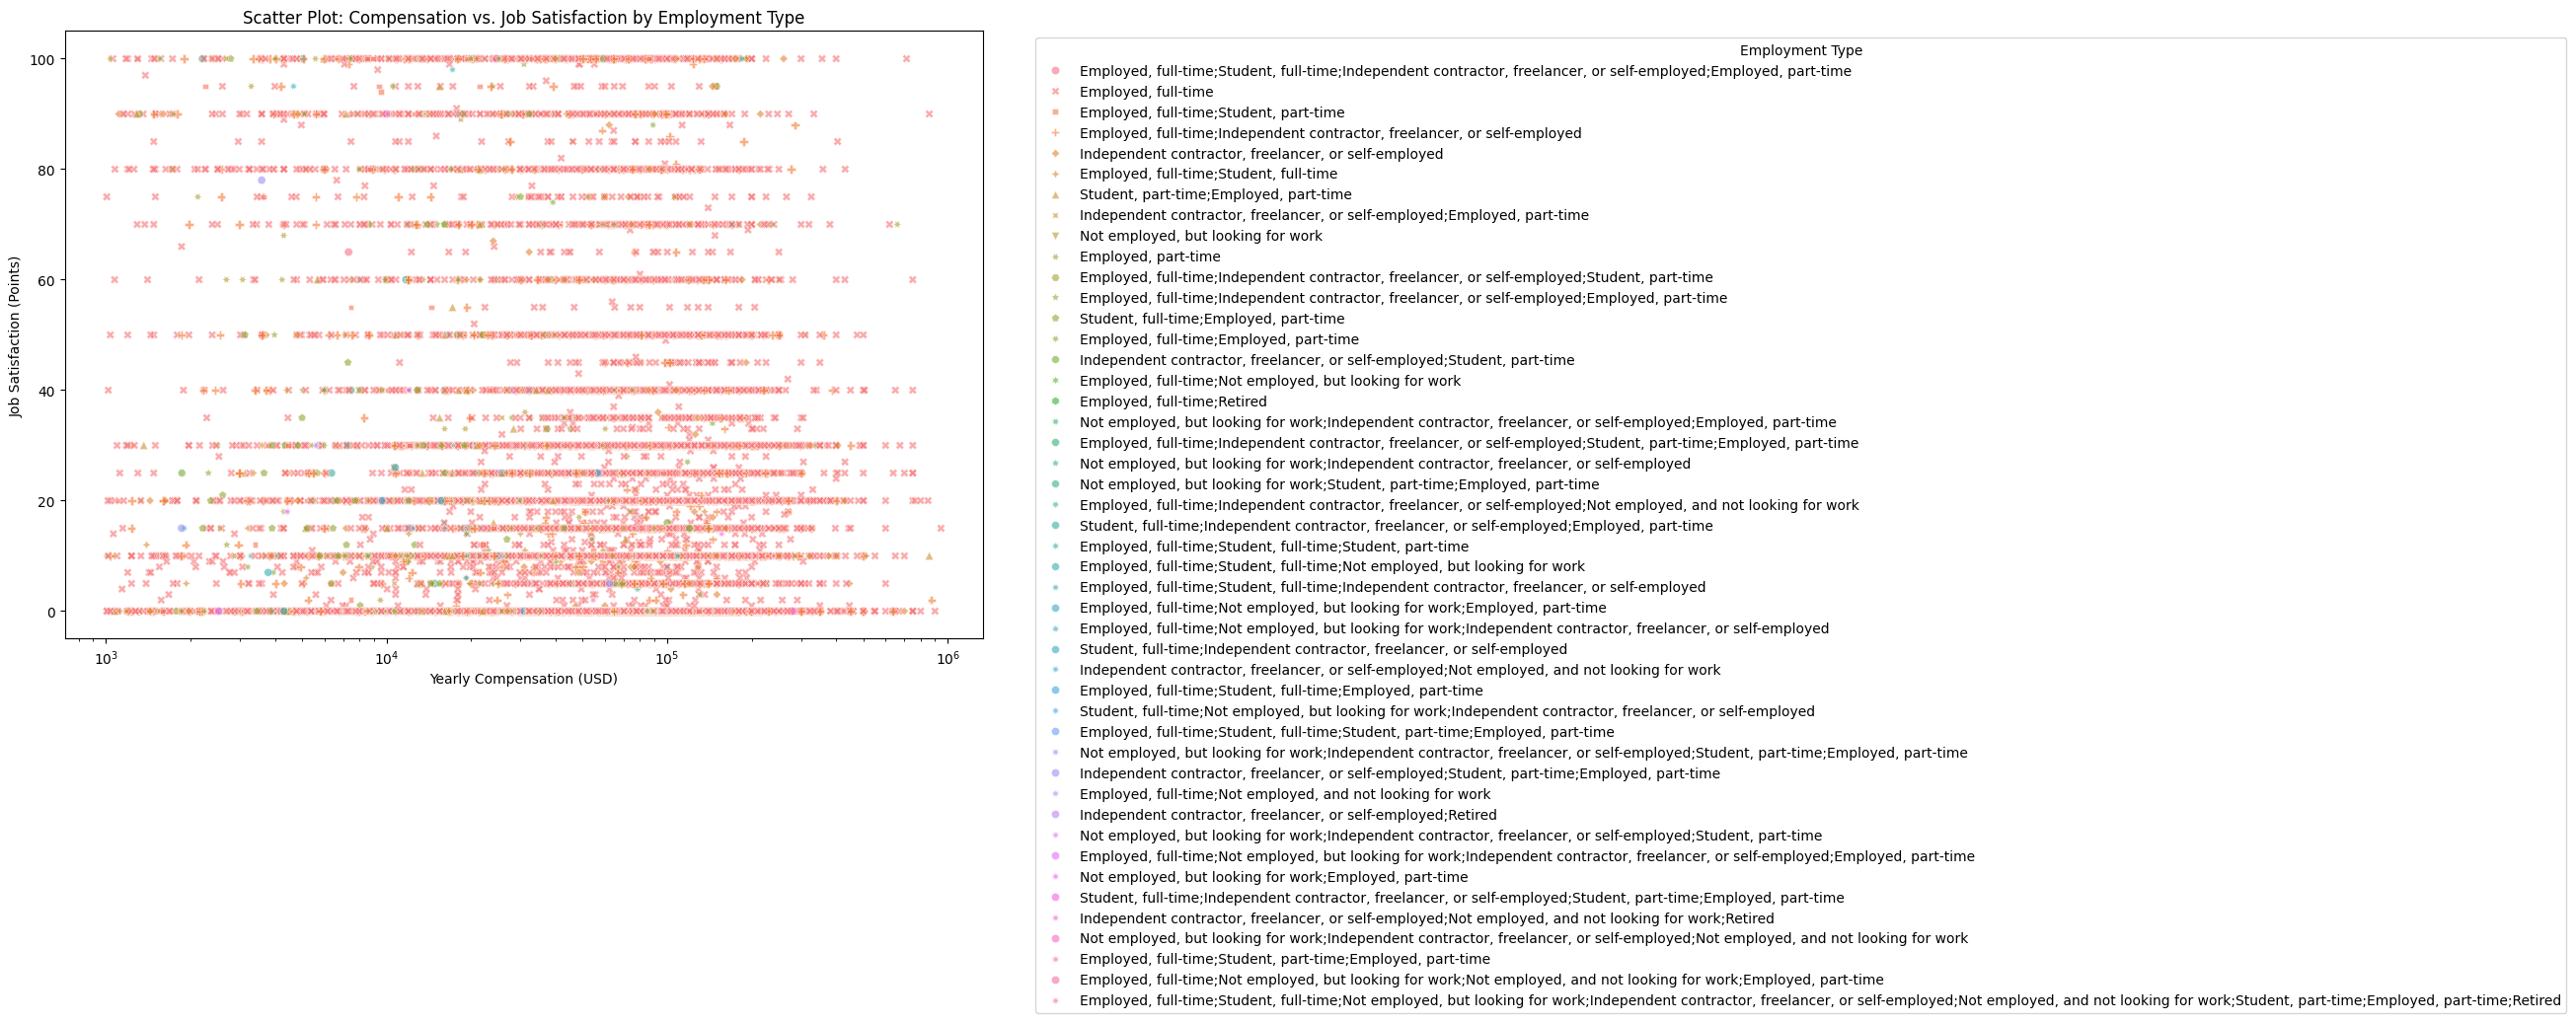

In [24]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect
conn = sqlite3.connect("survey-results-public.sqlite")
df = pd.read_sql_query("SELECT ConvertedCompYearly, JobSatPoints_6, Employment FROM main", conn)
conn.close()

# Convert numeric columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Filter unrealistic compensation
df = df[(df['ConvertedCompYearly'] > 1000) & (df['ConvertedCompYearly'] < 1_000_000)]

# Scatter Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    style='Employment',
    data=df,
    alpha=0.6
)

plt.title("Scatter Plot: Compensation vs. Job Satisfaction by Employment Type")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (Points)")
plt.xscale('log')   # salaries are skewed → log scale helps
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


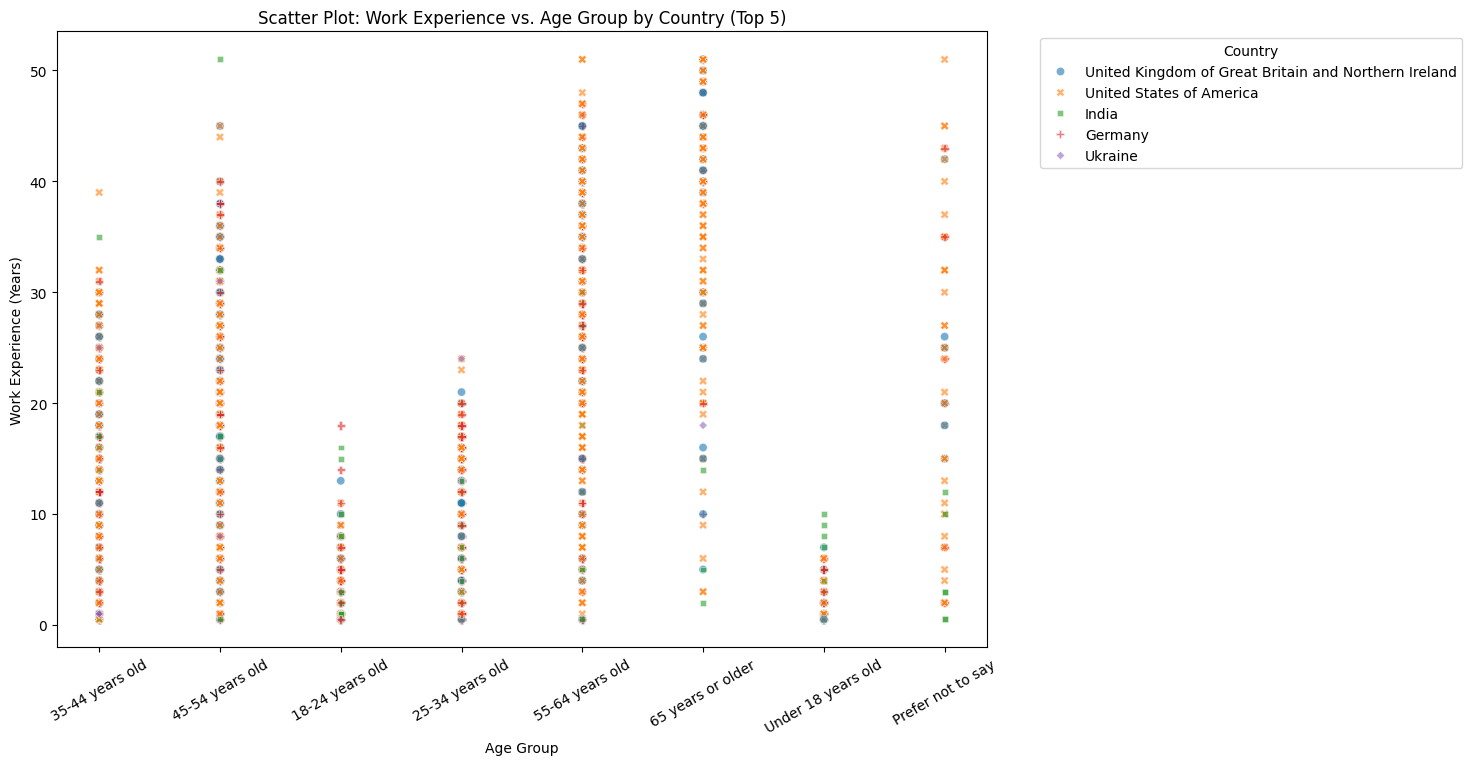

In [25]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect
conn = sqlite3.connect("survey-results-public.sqlite")
df = pd.read_sql_query("SELECT Age, YearsCodePro, Country FROM main", conn)
conn.close()

# Clean YearsCodePro
df['YearsCodePro'] = df['YearsCodePro'].replace(
    {"Less than 1 year": 0.5, "More than 50 years": 51}
)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['Age', 'YearsCodePro', 'Country'])

# Filter to top 5 countries by respondent count
top_countries = df['Country'].value_counts().head(5).index
df = df[df['Country'].isin(top_countries)]

# Scatter Plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Age',
    y='YearsCodePro',
    hue='Country',
    style='Country',
    data=df,
    alpha=0.6
)

plt.title("Scatter Plot: Work Experience vs. Age Group by Country (Top 5)")
plt.xlabel("Age Group")
plt.ylabel("Work Experience (Years)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
